In [1]:
import os
os.chdir("../")

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
import time
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from scripts.data_selection import separate_data
from scripts.model import LeadGenerator
from scripts.metrics import Metrics

In [3]:
df = pd.read_csv("data/data_to_use.csv")

In [4]:
df.head()

,fl_matriz,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_empresa_anos,idade_emp_cat,fl_me,fl_sa,...,idade_media_socios,idade_maxima_socios,idade_minima_socios,qt_socios_st_regular,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,qt_filiais,id
0,0.258667,1.845406,0.925304,-1.629903,-0.155488,-0.293631,0.485060,-0.669280,-0.05142,-0.136104,...,0.671323,0.722216,0.599322,0.484076,-1.486100,-1.394300,0.078853,-0.045536,-0.061444,a6984c3ae395090e3bee8ad63c3758b110de096d5d8195...
1,0.258667,-0.440166,0.217005,0.639601,0.809181,1.111097,-0.882350,-1.214972,-0.05142,-0.136104,...,-0.081970,-0.121498,-0.039441,0.031070,0.631962,0.690613,-0.018143,-0.045959,-0.061444,6178f41ade1365e44bc2c46654c2c8c0eaae27dcb476c4...
2,0.258667,-0.440166,-1.199593,0.639601,1.988220,1.111097,-0.289892,0.422105,-0.05142,-0.136104,...,0.139587,0.089430,0.188689,-0.421936,-1.750858,-1.654914,-0.023454,-0.045982,-0.061444,4a7e5069a397f12fdd7fd57111d6dc5d3ba558958efc02...
3,0.258667,-0.440166,-1.199593,0.639601,1.237922,1.111097,-0.351012,0.422105,-0.05142,-0.136104,...,0.316832,0.258173,0.371192,0.031070,0.631962,0.690613,-0.018143,-0.045959,-0.061444,3348900fe63216a439d2e5238c79ddd46ede454df7b9d8...
4,0.258667,-0.440166,0.925304,0.639601,1.452293,1.111097,-0.699568,-1.214972,-0.05142,-0.136104,...,-1.278376,-1.260513,-1.271340,-0.421936,0.631962,0.690613,-0.018143,-0.045959,-0.061444,1f9bcabc9d3173c1fe769899e4fac14b053037b953a1e4...


In [5]:
emp_1 = pd.read_csv("data/estaticos_portfolio1.csv")
emp_2 = pd.read_csv("data/estaticos_portfolio2.csv")
emp_3 = pd.read_csv("data/estaticos_portfolio3.csv")

# Criação do conjunto de treino

## Seleção de *features*

As seguintes variáveis foram selecionadas para criação do modelo:
- natureza_juridica_macro:
- sg_uf:
- de_ramo:
- setor:
- idade_emp_cat:
- nm_divisao:
- nm_segmento:
- sg_uf_matriz:
- de_saude_tributaria:
- de_nivel_atividade:
- nm_meso_regiao:
- qt_socios:
- de_faixa_faturamento_estimado:
- qt_filiais:

In [6]:
features = ["natureza_juridica_macro",
           "sg_uf",
           "de_ramo",
           "setor",
           "idade_emp_cat",
           "nm_divisao",
           "nm_segmento",
           "sg_uf_matriz",
           "de_saude_tributaria",
           "de_nivel_atividade",
           "nm_meso_regiao",
           "qt_socios",
           "de_faixa_faturamento_estimado",
           "qt_filiais",
           "id"]

In [7]:
df = df[features]

## Criação do banco de dados com o conjunto de dados original com as *features* selecionadas

In [8]:
df_or = pd.read_csv("data/estaticos_market.csv")
df_or = df_or[features]
df_or.to_csv("data/original_data_formated.csv", index = False)

## Criação do conjunto de treino

In [82]:
train_df, x_val, x_test, y_val, y_test = separate_data(df, emp_1, train = True)

# Teste do modelo

In [83]:
LG = LeadGenerator(train_df, x_val, x_test, y_val, y_test)
LG.fit()

Fit time: 1.6529486179351807s.
7 clusters are selected.


In [84]:
val, test = LG.predict()

Validation
Test


In [85]:
val[val["Client"] == 1].sort_values(by = "Similarity", ascending = False).head()

,ID,Similarity,Client
164859,b9ae0d174f9350b72b99f3e87e86c9c5824605606e3873...,0.906951,1
223488,defb5c4ee31b5249d174d150a0260784389c01912e26a7...,0.901205,1
27437,2fafa1f497c1b79eb94922287d8b1db9ce2d3a898f2f0b...,0.900478,1
186726,d02ca50913607dd2f6e3c514a42cb69179b3f0d9631f73...,0.886015,1
157203,69198b6059cf12adc877eef33551ad407df05121d0a072...,0.871417,1


In [86]:
test[test["Client"] == 1].sort_values(by = "Similarity", ascending = False).head()

,ID,Similarity,Client
103454,1e268dd48c5677f0c49a885fdfd66a47bc737678964f5d...,0.910591,1
195448,94fed6590e85e554f490474fe2bcc1c1c2d76f97e12920...,0.897358,1
109214,d5749a6b6e948213a5504c3a58016623cc64f7a3f9898a...,0.883715,1
166103,ecffcad800ccfd24dc6f43ed2f19a6fce9af5d9ff9ccea...,0.874341,1
120553,af129f2c7cd695e50c0270f679fbd2938855c9d968201a...,0.870758,1


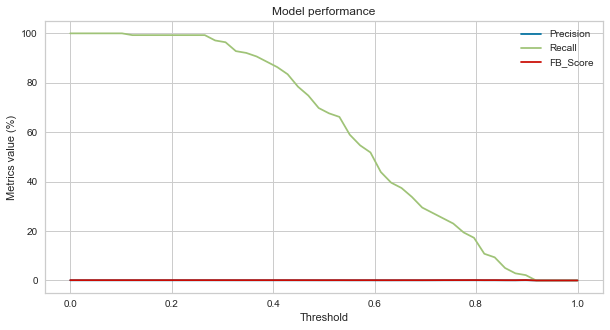

In [93]:
M = Metrics(val)
M.show_model_performance(50)

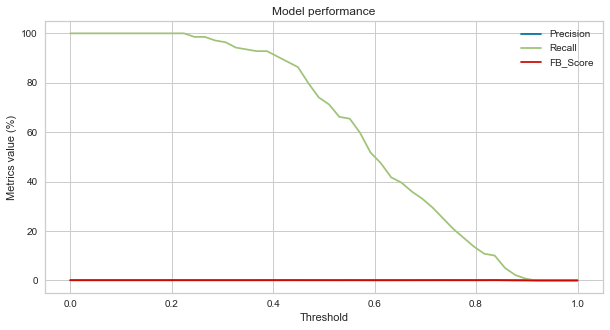

In [94]:
M = Metrics(test)
M.show_model_performance(50)

# Validação final

In [88]:
train_df, client_df = separate_data(df, emp_1, train = False)

In [89]:
LG = LeadGenerator(train_df)
LG.fit()

Fit time: 1.6354358196258545s.
4 clusters are selected.


In [90]:
predictions = LG.predict_leads(client_df)

In [91]:
predictions.sort_values(by = "Similarity", ascending = False).head()

,ID,Similarity,Cluster
12892,1cc2065c59abef185b7d000b806a060688feee14d71ce0...,0.955382,3
408024,7f24938ea6c4511a3201e9564721079e2bad53e4c7bd88...,0.952897,0
361103,f4285a87172d225979cd9819effaea1e19a8f6874becd9...,0.952108,3
280438,68b57b3af8486cbbd47cf0091ea30eb2dc8163ac3cc6b0...,0.952108,3
369003,2954721d2dca7ebc9c82e14479a396894930d2435bcf53...,0.952108,3


# Salvando conjunto de dados

In [47]:
df.to_csv("data/data_final.csv", index = False)